In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from topoflow.components import evap_priestley_taylor

Importing TopoFlow packages:
   topoflow.utils
   topoflow.utils.tests
   topoflow.components
   topoflow.components.tests
   topoflow.framework
   topoflow.framework.tests
   topoflow.gui (unfinished)
 
 
Paths for this package:
framework_dir = /Users/elja0262/Google Drive/active_projects/Topoflow_all/topoflow/topoflow/framework/
parent_dir    = /Users/elja0262/Google Drive/active_projects/Topoflow_all/topoflow/topoflow/
examples_dir  = /Users/elja0262/Google Drive/active_projects/Topoflow_all/topoflow/topoflow/examples/
__file__      = topoflow/framework/emeli.pyc
__name__      = topoflow.framework.emeli
 


In [2]:
cfg_file='topoflow/examples/Treynor_Iowa/June_20_67_evap_priestley_taylor.cfg'
evap=evap_priestley_taylor.evap_component()

In [3]:
# will not run without these
evap.Qn_SW=3100
evap.Qn_LW=1100
evap.T_air=20
evap.T_surf=10
evap.initialize(cfg_file);
evap.get_current_time()


 
Evaporation component: Initializing...
Imported netCDF4 version: 1.1.9


/Users/elja0262/anaconda/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2507: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


array(0.0)

In [4]:
time = [evap.get_current_time().copy()]
# NOTE: EMELI does not have get_value

#Qc=[evap.Qc.copy()] #'W m-2' 'land_surface_soil__conduction_heat_flux'
#NOTE: that the model calculates Qc only after update 
Qc=[0.0]
vol_ET=[evap.vol_ET.copy()]  #'m3' 'land_surface_water__domain_time_integral_of_evaporation_volume_flux'
ET=[evap.ET.copy()]  #'m s-1' 'land_surface_water__evaporation_volume_flux' 


print evap.get_current_time(), evap.get_end_time()
while evap.get_current_time() < evap.get_end_time():
    evap.update()
    time.append(evap.get_current_time().copy())
    #print 'Qc=',evap.Qc, 'W m-2'
    #print 'vol_ET=',evap.vol_ET, 'm3'
    #print 'ET=',evap.ET, 'm s-1'
    
    Qc.append(evap.Qc.copy()) 
    vol_ET.append(evap.vol_ET.copy()) 
    ET.append(evap.ET.copy())  

print np.shape(time), np.shape(Qc), np.shape(vol_ET), np.shape(ET)

0.0 36000.0
(11,) (11,) (11,) (11, 44, 29)


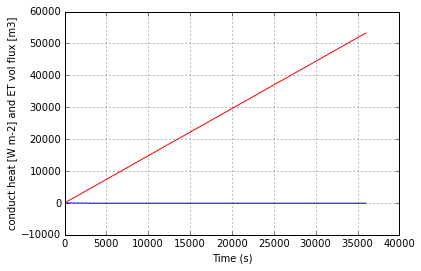

In [5]:
plt.plot(time,Qc,'b',time,vol_ET,'r'); 
plt.xlabel('Time (s)')
plt.ylabel('conduct heat [W m-2] and ET vol flux [m3]')
plt.grid(); plt.show()

In [6]:
print Qc

[0.0, -90.0, -90.0, -90.0, -90.0, -90.0, -90.0, -90.0, -90.0, -90.0, -90.0]
